In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from numpy import load
from numpy import expand_dims
from numpy import asarray
import os
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
import time
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
gait_train_path_000 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\000\\train"
gait_train_path_054 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\054\\train"
gait_train_path_090 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\090\\train"
gait_train_path_018 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\018\\train"
gait_train_path_036 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\036\\train"
gait_train_path_072 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\072\\train"
face_train_path = "C:\\Users\\Aayush Kandpal\\Downloads\\Face_dataset_ML\\Face_dataset\\train"

gait_val_path_000 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\000\\val"
gait_val_path_054 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\054\\val"
gait_val_path_090 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\090\\val"
gait_val_path_018 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\018\\val"
gait_val_path_036 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\036\\val"
gait_val_path_072 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\072\\val"
face_val_path = "C:\\Users\\Aayush Kandpal\\Downloads\\Face_dataset_ML\\Face_dataset\\val"

gait_test_path_000 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\000\\test"
gait_test_path_054 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\054\\test"
gait_test_path_090 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\090\\test"
gait_test_path_018 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\018\\test"
gait_test_path_036 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\036\\test"
gait_test_path_072 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\072\\test"
face_test_path = "C:\\Users\\Aayush Kandpal\\Downloads\\Face_dataset_ML\\Face_dataset\\test"


In [20]:
def create_dataset(img_folder):
    
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path))
            image= np.resize(image,(224,224))
            image = image.astype('float32')
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array , class_name

def create_array(data):
    return np.array(data)
    

In [21]:
train_0,class_0=create_dataset(gait_train_path_000)
train_54,class_54=create_dataset(gait_train_path_054)
train_90,class_90=create_dataset(gait_train_path_090)
train_18,class_18=create_dataset(gait_train_path_018)
train_36,class_36=create_dataset(gait_train_path_036)
train_72,class_72=create_dataset(gait_train_path_072)
face_train,train_class=create_dataset(face_train_path)


val_0,class_val_0=create_dataset(gait_val_path_000)
val_54,class_val_54=create_dataset(gait_val_path_054)
val_90,class_val_90=create_dataset(gait_val_path_090)
val_18,class_val_18=create_dataset(gait_val_path_018)
val_36,class_val_36=create_dataset(gait_val_path_036)
val_72,class_val_72=create_dataset(gait_val_path_072)
face_val,val_class=create_dataset(face_val_path)

test_0,class_test_0=create_dataset(gait_test_path_000)
test_54,class_test_54=create_dataset(gait_test_path_054)
test_90,class_test_90=create_dataset(gait_test_path_090)
test_18,class_test_18=create_dataset(gait_test_path_018)
test_36,class_test_36=create_dataset(gait_test_path_036)
test_72,class_test_72=create_dataset(gait_test_path_072)
face_test,test_class=create_dataset(face_test_path)

x_train_0=np.array(train_0)
x_train_54=np.array(train_54)
x_train_90=np.array(train_90)
x_train_18=np.array(train_18)
x_train_36=np.array(train_36)
x_train_72=np.array(train_72)
x_train_face=np.array(face_train)

x_val_0=np.array(val_0)
x_val_54=np.array(val_54)
x_val_90=np.array(val_90)
x_val_18=np.array(val_18)
x_val_36=np.array(val_36)
x_val_72=np.array(val_72)
x_val_face=np.array(face_val)

x_test_0=np.array(test_0)
x_test_54=np.array(test_54)
x_test_90=np.array(test_90)
x_test_18=np.array(test_18)
x_test_36=np.array(test_36)
x_test_72=np.array(test_72)
x_test_face=np.array(face_test)

train_label=np.array(class_0)
val_label=np.array(class_val_0)
test_label=np.array(class_test_0)


In [22]:
# Let us now flatten the dataset and convert each 
x_train_0=pd.DataFrame(x_train_0.reshape((x_train_0.shape[0],224*224)))
x_train_54=pd.DataFrame(x_train_54.reshape((x_train_54.shape[0],224*224)))
x_train_90=pd.DataFrame(x_train_90.reshape((x_train_90.shape[0],224*224)))
x_train_18=pd.DataFrame(x_train_18.reshape((x_train_18.shape[0],224*224)))
x_train_36=pd.DataFrame(x_train_36.reshape((x_train_36.shape[0],224*224)))
x_train_72=pd.DataFrame(x_train_72.reshape((x_train_72.shape[0],224*224)))

x_train_face=pd.DataFrame(x_train_face.reshape((x_train_face.shape[0],224*224)))

x_val_0=pd.DataFrame(x_val_0.reshape((x_val_0.shape[0],224*224)))
x_val_54=pd.DataFrame(x_val_54.reshape((x_val_54.shape[0],224*224)))
x_val_90=pd.DataFrame(x_val_90.reshape((x_val_90.shape[0],224*224)))
x_val_18=pd.DataFrame(x_val_18.reshape((x_val_18.shape[0],224*224)))
x_val_36=pd.DataFrame(x_val_36.reshape((x_val_36.shape[0],224*224)))
x_val_72=pd.DataFrame(x_val_72.reshape((x_val_72.shape[0],224*224)))

x_val_face=pd.DataFrame(x_val_face.reshape((x_val_face.shape[0],224*224)))

x_test_0=pd.DataFrame(x_test_0.reshape((x_test_0.shape[0],224*224)))
x_test_54=pd.DataFrame(x_test_54.reshape((x_test_54.shape[0],224*224)))
x_test_90=pd.DataFrame(x_test_90.reshape((x_test_90.shape[0],224*224)))
x_test_18=pd.DataFrame(x_test_18.reshape((x_test_18.shape[0],224*224)))
x_test_36=pd.DataFrame(x_test_36.reshape((x_test_36.shape[0],224*224)))
x_test_72=pd.DataFrame(x_test_72.reshape((x_test_72.shape[0],224*224)))

x_test_face=pd.DataFrame(x_test_face.reshape((x_test_face.shape[0],224*224)))

train_label=pd.DataFrame(train_label).astype(int)
val_label=pd.DataFrame(val_label).astype(int)
test_label=pd.DataFrame(test_label).astype(int)


In [4]:
angle=[0,54,90,18,36,72]
j=[1,2,3,4,5,6]

for angle in angles:
    for i in j:
        
        tic=time.time()
        pca=PCA(n_components=0.99)
        f'tra= pd.DataFrame(pca.fit_transform(f'x_train_{angle}'))
        f'val_{angle}' = pd.DataFrame(pca.transform(f'x_val_{angle}'))
        f'test_{angle}'=pd.DataFrame(pca.transform(f'x_test_{angle}'))
        toc=time.time()
        print("Dimensionality reduced to:", pca.n_components_)
        print("Time taken to reduce the size of the data : "+str((toc-tic))+" sec")
        print(f'x_train_{angle}'.shape,f'x_val_{angle}'.shape,f'x_test_{angle}'.shape)

SyntaxError: cannot assign to f-string expression (<ipython-input-4-45288624032e>, line 7)

In [23]:
tic=time.time()
pca=PCA(n_components=0.99)

x_train_0 = pd.DataFrame(pca.fit_transform(x_train_0))
x_val_0 = pd.DataFrame(pca.transform(x_val_0))
x_test_0=pd.DataFrame(pca.transform(x_test_0))
toc=time.time()
print("Dimensionality reduced to:", pca.n_components_)
print("Time taken to reduce the size of the data : "+str((toc-tic))+" sec")
print("----------------------------------------------------------------------")

pca=PCA(n_components=0.99)
x_train_54 = pd.DataFrame(pca.fit_transform(x_train_54))
x_val_54 = pd.DataFrame(pca.transform(x_val_54))
x_test_54=pd.DataFrame(pca.transform(x_test_54))
toc=time.time()
print("Dimensionality reduced to:", pca.n_components_)
print("Time taken to reduce the size of the data : "+str((toc-tic))+" sec")
print("----------------------------------------------------------------------")

pca=PCA(n_components=0.99)
x_train_90 = pd.DataFrame(pca.fit_transform(x_train_90))
x_val_90= pd.DataFrame(pca.transform(x_val_90))
x_test_90=pd.DataFrame(pca.transform(x_test_90))
toc=time.time()
print("Dimensionality reduced to:", pca.n_components_)
print("Time taken to reduce the size of the data : "+str((toc-tic))+" sec")
print("----------------------------------------------------------------------")

pca=PCA(n_components=0.99)
x_train_18 = pd.DataFrame(pca.fit_transform(x_train_18))
x_val_18 = pd.DataFrame(pca.transform(x_val_18))
x_test_18=pd.DataFrame(pca.transform(x_test_18))
toc=time.time()
print("Dimensionality reduced to:", pca.n_components_)
print("Time taken to reduce the size of the data : "+str((toc-tic))+" sec")
print("----------------------------------------------------------------------")

pca=PCA(n_components=0.99)
x_train_36 = pd.DataFrame(pca.fit_transform(x_train_36))
x_val_36 = pd.DataFrame(pca.transform(x_val_36))
x_test_36=pd.DataFrame(pca.transform(x_test_36))
toc=time.time()
print("Dimensionality reduced to:", pca.n_components_)
print("Time taken to reduce the size of the data : "+str((toc-tic))+" sec")
print("----------------------------------------------------------------------")

pca=PCA(n_components=0.99)
x_train_72 = pd.DataFrame(pca.fit_transform(x_train_72))
x_val_72= pd.DataFrame(pca.transform(x_val_72))
x_test_72=pd.DataFrame(pca.transform(x_test_72))
toc=time.time()
print("Dimensionality reduced to:", pca.n_components_)
print("Time taken to reduce the size of the data : "+str((toc-tic))+" sec")
print("----------------------------------------------------------------------")

pca=PCA(n_components=0.99)
x_train_face = pd.DataFrame(pca.fit_transform(x_train_face))
x_val_face = pd.DataFrame(pca.transform(x_val_face))
x_test_face=pd.DataFrame(pca.transform(x_test_face))
toc=time.time()
print("Dimensionality reduced to:", pca.n_components_)
print("Time taken to reduce the size of the data : "+str((toc-tic))+" sec")
print("----------------------------------------------------------------------")



Dimensionality reduced to: 27
Time taken to reduce the size of the data : 5.51935338973999 sec
----------------------------------------------------------------------
Dimensionality reduced to: 31
Time taken to reduce the size of the data : 11.430112361907959 sec
----------------------------------------------------------------------
Dimensionality reduced to: 31
Time taken to reduce the size of the data : 17.31436824798584 sec
----------------------------------------------------------------------
Dimensionality reduced to: 27
Time taken to reduce the size of the data : 23.058878183364868 sec
----------------------------------------------------------------------
Dimensionality reduced to: 26
Time taken to reduce the size of the data : 28.9971706867218 sec
----------------------------------------------------------------------
Dimensionality reduced to: 31
Time taken to reduce the size of the data : 34.96630096435547 sec
---------------------------------------------------------------------

In [24]:
# Let us now make our dataset by concatenating all feature columns
train_data=pd.concat([x_train_face,x_train_0,x_train_54,x_train_90,x_train_18,x_train_36,x_train_72,train_label],axis=1)
val_data=pd.concat([x_val_face,x_val_0,x_val_54,x_val_90,x_val_18,x_val_36,x_val_72,val_label],axis=1)
test_data=pd.concat([x_test_face,x_test_0,x_test_54,x_test_90,x_test_18,x_test_36,x_test_72,test_label],axis=1)

train_data.columns = [*train_data.columns[:-1], 'label']
val_data.columns = [*val_data.columns[:-1], 'label']
test_data.columns = [*test_data.columns[:-1], 'label']

In [28]:
train_data=train_data.dropna()
test_data=test_data.dropna()
val_data=val_data.dropna()

In [29]:
train_data.shape,val_data.shape,test_data.shape

((180, 252), (60, 252), (60, 252))

In [33]:
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)
val_data = val_data.sample(frac=1).reset_index(drop=True)

In [34]:
X_train=train_data.drop('label',axis=1)
Y_train=train_data.label

X_test=test_data.drop('label',axis=1)
Y_test=test_data.label

X_val=val_data.drop('label',axis=1)
Y_val=val_data.label

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [49]:
val_pred=rf.predict(X_val)
rf_pred=rf.predict(X_test)

In [50]:
print(classification_report(Y_val,val_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67        10
           2       1.00      1.00      1.00        10
           3       0.00      0.00      0.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10

    accuracy                           0.83        60
   macro avg       0.75      0.83      0.78        60
weighted avg       0.75      0.83      0.78        60



C:\Users\Aayush Kandpal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
pred1=rf.predict(X_test)
print(classification_report(Y_test,pred1))

              precision    recall  f1-score   support

         1.0       0.67      1.00      0.80        10
         2.0       0.00      0.00      0.00        10
         3.0       0.00      0.00      0.00        10
         4.0       0.00      0.00      0.00        10
         5.0       0.67      1.00      0.80        10
         6.0       0.33      1.00      0.50        10

    accuracy                           0.50        60
   macro avg       0.28      0.50      0.35        60
weighted avg       0.28      0.50      0.35        60



C:\Users\Aayush Kandpal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
svm=LinearSVC()
svm.fit(X_train,Y_train)
val_pred1=svm.predict(X_val)
print(classification_report(Y_val,val_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



C:\Users\Aayush Kandpal\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [53]:
svm_pred1=svm.predict(X_test)
print(classification_report(Y_test,svm_pred1))

              precision    recall  f1-score   support

         1.0       0.20      0.90      0.33        10
         2.0       0.00      0.00      0.00        10
         3.0       1.00      1.00      1.00        10
         4.0       0.00      0.00      0.00        10
         5.0       0.00      0.00      0.00        10
         6.0       0.00      0.00      0.00        10

    accuracy                           0.32        60
   macro avg       0.20      0.32      0.22        60
weighted avg       0.20      0.32      0.22        60



C:\Users\Aayush Kandpal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
lg=LogisticRegression(random_state=0,multi_class='auto',max_iter=250,verbose=5,n_jobs=-1)
lg.fit(X_train,Y_train)
pred=lg.predict(X_val)
print(classification_report(Y_val,pred))
print(accuracy_score(Y_val,pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

1.0


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.9s finished


In [55]:
lg_pred1=lg.predict(X_test)
print(classification_report(Y_test,lg_pred1))

              precision    recall  f1-score   support

         1.0       0.29      1.00      0.44        10
         2.0       0.00      0.00      0.00        10
         3.0       1.00      1.00      1.00        10
         4.0       0.00      0.00      0.00        10
         5.0       0.00      0.00      0.00        10
         6.0       0.00      0.00      0.00        10

    accuracy                           0.33        60
   macro avg       0.21      0.33      0.24        60
weighted avg       0.21      0.33      0.24        60



C:\Users\Aayush Kandpal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
lgb_clf=lgb.LGBMClassifier()
lgb_clf.fit(X_train,Y_train)
pred=lgb_clf.predict(X_val)
print(classification_report(Y_val,pred))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80        10
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00        10
           4       0.38      0.50      0.43        10
           5       0.00      0.00      0.00        10
           6       1.00      1.00      1.00        10

    accuracy                           0.75        60
   macro avg       0.65      0.75      0.69        60
weighted avg       0.65      0.75      0.69        60



In [57]:
lgb_pred1=lgb_clf.predict(X_test)
print(classification_report(Y_test,lgb_pred1))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        10
         2.0       0.00      0.00      0.00        10
         3.0       1.00      0.50      0.67        10
         4.0       0.00      0.00      0.00        10
         5.0       0.00      0.00      0.00        10
         6.0       0.29      1.00      0.44        10

    accuracy                           0.42        60
   macro avg       0.38      0.42      0.35        60
weighted avg       0.38      0.42      0.35        60



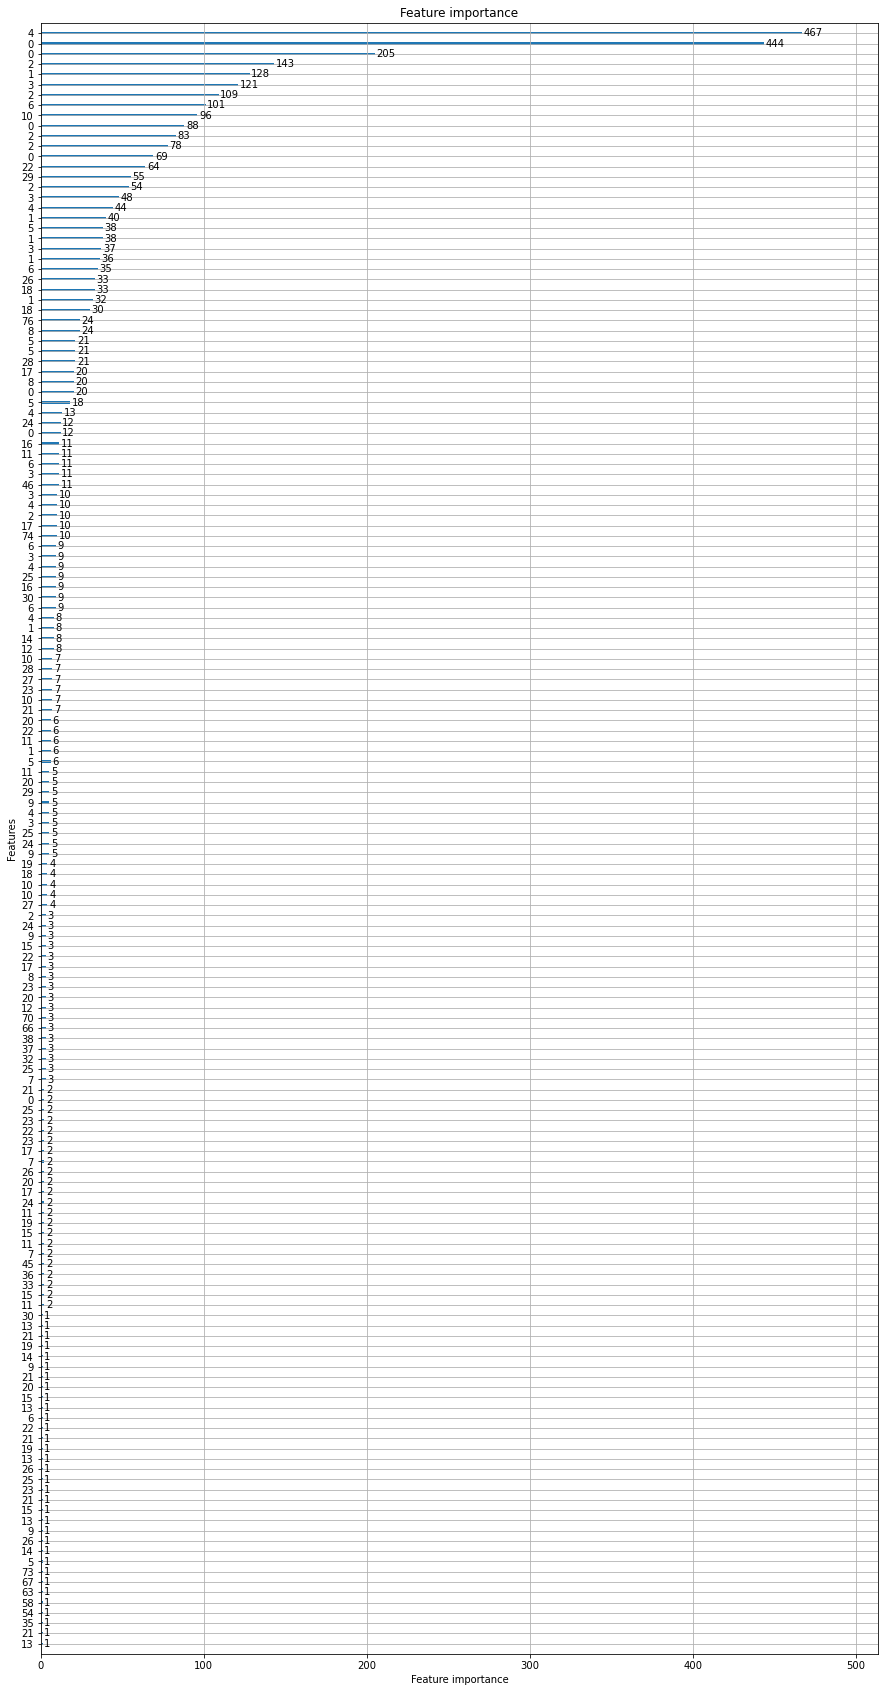

In [72]:
lgb.plot_importance(lgb_clf,figsize=(15,30))
plt.show()

feature_important = xgb_clf.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())


data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh',figsize=(30,15))

In [66]:
X_train.shape,Y_train.shape

((180, 251), (180,))